In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE =[224,224]
train_path = "/content/gdrive/MyDrive/New Plant Diseases Dataset(Augmented)/train"
test_path ="/content/gdrive/MyDrive/New Plant Diseases Dataset(Augmented)/valid"

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [5]:
for layer in inception.layers:
  layer.trainable=False

In [6]:
folders= glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')

In [7]:
len(folders)

10

In [8]:
x= Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders),activation='softmax')(x)
model = Model(inputs=inception.input,outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 4585 images belonging to 10 classes.


In [16]:
r= model.fit(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/10
574/574 [==============================] - 3487s 6s/step - loss: 2.3539 - accuracy: 0.7581 - val_loss: 2.1890 - val_accuracy: 0.7858
Epoch 2/10
574/574 [==============================] - 239s 417ms/step - loss: 1.9368 - accuracy: 0.8160 - val_loss: 1.8286 - val_accuracy: 0.8366
Epoch 3/10
574/574 [==============================] - 238s 414ms/step - loss: 2.1160 - accuracy: 0.8256 - val_loss: 2.6810 - val_accuracy: 0.8070
Epoch 4/10
574/574 [==============================] - 240s 418ms/step - loss: 1.8878 - accuracy: 0.8484 - val_loss: 3.3651 - val_accuracy: 0.7847
Epoch 5/10
574/574 [==============================] - 237s 414ms/step - loss: 1.8287 - accuracy: 0.8602 - val_loss: 2.5741 - val_accuracy: 0.8212
Epoch 6/10
574/574 [==============================] - 236s 412ms/step - loss: 1.7812 - accuracy: 0.8695 - val_loss: 3.0728 - val_accuracy: 0.8124
Epoch 7/10
574/574 [==============================] - 236s 411ms/step - loss: 1.8275 - accuracy: 0.8752 - val_loss: 2.9417 - v

In [17]:
import matplotlib.pyplot as plt

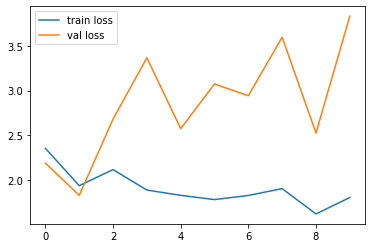

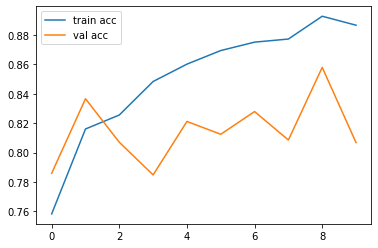

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 8.3272395e-33, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 9.7773522e-35, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.0807081e-22, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0434318e-22, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([7, 8, 8, ..., 6, 4, 9])